In [5]:
library(patchwork)
library(ggplot2)
library(magick)
library(tidytext)
library(SingleCellExperiment)
library(tidyHeatmap)
library(dplyr)
library(tidyr)
library(plotgardener)
library(ggplot2)
library(ggrepel)
library(gridExtra)
source('./ABCA7lof2/plotting.r')

Linking to ImageMagick 7.1.1.11
Enabled features: cairo, fontconfig, freetype, fftw, rsvg, webp, x11
Disabled features: ghostscript, heic, lcms, pango, raw

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs,

In [6]:
cols = c('grey', 'red')
names(cols) = c('Con', 'LoF')
colors = readRDS('./processed_data//Cell_group_colors.rds')

<u>**Figure 1**</u>
<a name="F1"></a>

In [ ]:
### make M-R more visible
### order S

In [301]:
colData = read.csv('./processed_data/single_cell/colData.csv')
coords = colData[,c('x', 'y', 'ABCA7LoF', 'projid', 'leiden_clusters', 'annotations2', 'gaussian_liklihood')]
coords$ABCA7LoF = ifelse(coords$ABCA7LoF==1, 'LoF', 'Con')

coords = read.csv('../ABCA7lof//processed_data//for_plotting/umap_coords.csv', row.names=1)


In [4]:
sce = readRDS('./processed_data/single_cell/sce.rds')
coords$ABCA7 = logcounts(sce)['ABCA7',]

In [9]:
# plot cartoon
abca7_gene = image_ggplot(image_read('../ABCA7lof/svgs/abca7_gene.png'))
cohort_cartoon = image_ggplot(image_trim(image_read('../ABCA7lof/svgs/cohort_cartoon.png')))

In [37]:
abca7_expression = plot_coords_by_gene(coords, 'x', 'y', 'ABCA7', 'node_centrality', low='white', high='red')

In [38]:
# plot cells
size=4
cells_plot = plot_coords_by_grp(coords, 'x', 'y', 'celltype', 'node_centrality', colors)+annotate(geom="text", x=-2, y=13, label="Excitatory Neurons",color=colors['Ex'], size=size, fontface='italic')+
annotate(geom="text", x=9, y=-1, label="Oligodendrocytes",color=colors['Oli'], size=size, fontface='italic')+
annotate(geom="text", x=7, y=-14, label="Astrocytes",color=colors['Ast'], size=size, fontface='italic')+
annotate(geom="text", x=4, y=10, label="Inhibitory Neurons",color=colors['In'], size=size, fontface='italic')+
annotate(geom="text", x=12, y=3, label="Microglia",color=colors['Mic'], size=size, fontface='italic')+
annotate(geom="text", x=2, y=-5, label="OPCs",color=colors['Opc'], size=size, fontface='italic')+
annotate(geom="text", x=-7, y=-11, label="Vascular Cells",color=colors['Endo'], size=size, fontface='italic')

In [302]:
# plot LoF
size=4
coords$LoF = ifelse(coords$LoF=='LOF', 'LoF', 'Con')
lof_plot = plot_coords_by_grp(coords, 'x', 'y', 'LoF', 'node_centrality', cols)#+annotate(geom="text", x=-2, y=13, label="Excitatory Neurons",color=colors['Ex'], size=size, fontface='italic')

In [183]:
ex_u = image_ggplot((image_read_pdf('./pdf_figures/Exumap.pdf')))
in_u = image_ggplot((image_read_pdf('./pdf_figures/Inumap.pdf')))
ast_u = image_ggplot((image_read_pdf('./pdf_figures/Astumap.pdf')))
mic_u = image_ggplot((image_read_pdf('./pdf_figures/Micumap.pdf')))
oli_u = image_ggplot((image_read_pdf('./pdf_figures/Oliumap.pdf')))
opc_u = image_ggplot((image_read_pdf('./pdf_figures/Opcumap.pdf')))
overview = image_ggplot((image_read_pdf('./pdf_figures/cluster_overview.pdf')))
overview1 = image_ggplot((image_read_pdf('./pdf_figures/Exumap_exp_overview.pdf')))

bar = image_ggplot(image_trim(image_read_pdf('./pdf_figures/clusters_barplot.pdf')))

In [146]:
ex_uc = image_ggplot(image_trim(image_read_pdf('./pdf_figures/Exumap_clust.pdf')))
in_uc = image_ggplot(image_trim(image_read_pdf('./pdf_figures/Inumap_clust.pdf')))
ast_uc = image_ggplot(image_trim(image_read_pdf('./pdf_figures/Astumap_clust.pdf')))
mic_uc = image_ggplot(image_trim(image_read_pdf('./pdf_figures/Micumap_clust.pdf')))
oli_uc = image_ggplot(image_trim(image_read_pdf('./pdf_figures/Oliumap_clust.pdf')))
opc_uc = image_ggplot(image_trim(image_read_pdf('./pdf_figures/Opcumap_clust.pdf')))

In [91]:
legend = image_ggplot(image_trim(image_read('./pdf_figures/legend.png')))

In [308]:
row1 = ((cohort_cartoon / abca7_gene) | (lof_plot|cells_plot)) + plot_layout(widths=c(2,2))
row2 = (ex_u | in_u | ast_u )/ (mic_u | oli_u | opc_u)
row3 = (ex_uc | in_uc | ast_uc | mic_uc | oli_uc | opc_uc)
row4 = legend | bar

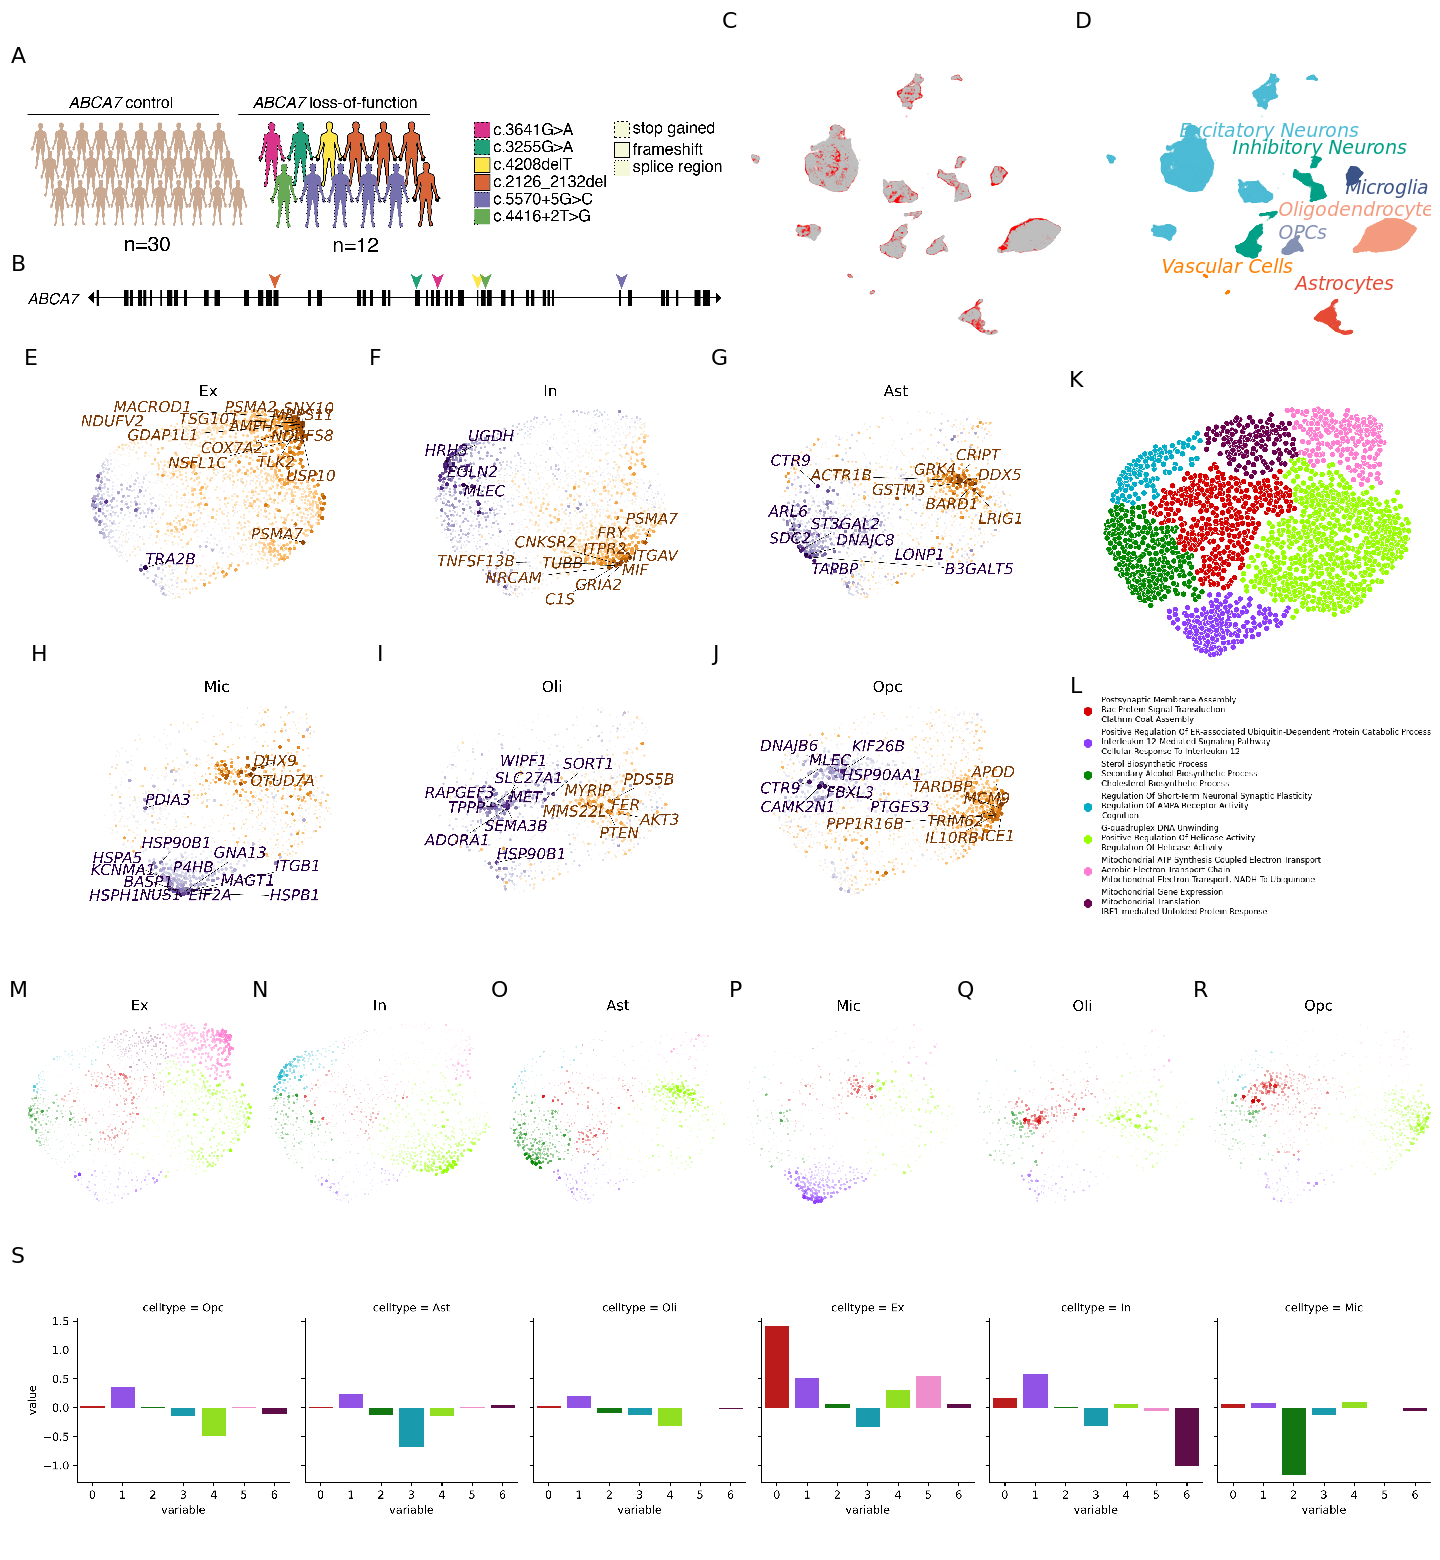

In [309]:
options(repr.plot.width=12, repr.plot.height=13)

(row1 / ((row2|(overview/legend)) + plot_layout(widths=c(3,1))) / row3 / bar) + plot_layout(heights=c(1,2,1,1)) + plot_annotation(tag_levels = 'A')

In [6]:
all_paths = readRDS('../ABCA7lof/processed_data/single_cell_data//analysis_input_data_nov10.rds')

In [1]:
degs = readRDS('./processed_data/single_cell/pseudobulk_degs.rds')

In [4]:
degs$degs_all$Ex$res['JAK2',]

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
JAK2,0.251006,6.917032,2.28365,0.03021615,0.9902329,-3.554326


In [3]:
all_data = readRDS('./processed_data/single_cell/stats_input_data.rds')

In [11]:
df = as.data.frame(unique(unname(unlist(all_data$expressed10))))
colnames(df)= 'ten_percent_expressed'
write.csv(df, './processed_data/single_cell/10_percent_expressed.csv')

<u>**Figure 2**</u>
<a name="F3"></a>

In [ ]:
### Show ABCA7 projection A
### show detection rate B
### Show LE clusters colored by cluster C
### Shoe LE clusters colored by fold change D
### Show cluster summary score & pathway name E

In [40]:
clusters = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex.png')))
scores = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_scores.png')))
names = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names0.png')))
names1 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names1.png')))
names2 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names2.png')))
names3 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names3.png')))
names4 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names4.png')))
names5 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names5.png')))
names6 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names6.png')))
names7 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names7.png')))
names8 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names8.png')))
names9 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names9.png')))

In [222]:
bars = image_ggplot((image_read('./pdf_figures/ex_clust_bars.png')))

In [190]:
options(repr.plot.width=10, repr.plot.height=1.4)
row = (((names9 | names4) / (names7 |names8) /(names3|names5)/ (names | names2) / (names6|names1)))#/bars) + plot_layout(heights=c(1,1,1,1,1,1,2))

In [191]:
coords = read.csv('../ABCA7lof//processed_data//for_plotting/umap_coords.csv', row.names=1)

abca7_expression = plot_coords_by_gene(coords, 'x', 'y', 'ABCA7', 'node_centrality', low='white', high='seagreen')



In [105]:
all_data = readRDS('./processed_data/single_cell/stats_input_data.rds')

In [192]:
x = all_data$det.rate.celltype['ABCA7',]
x = x[order(-1*x)]
x = as.data.frame(x)
x$cell = factor(rownames(x), levels = rownames(x))

p<-ggplot(data=x, aes(x=cell, y=x, fill = cell)) +
  geom_bar(stat="identity") + theme_classic() + scale_fill_manual(values = colors[x$cell]) + ylab('fraction of cells where counts > 0') + xlab('')


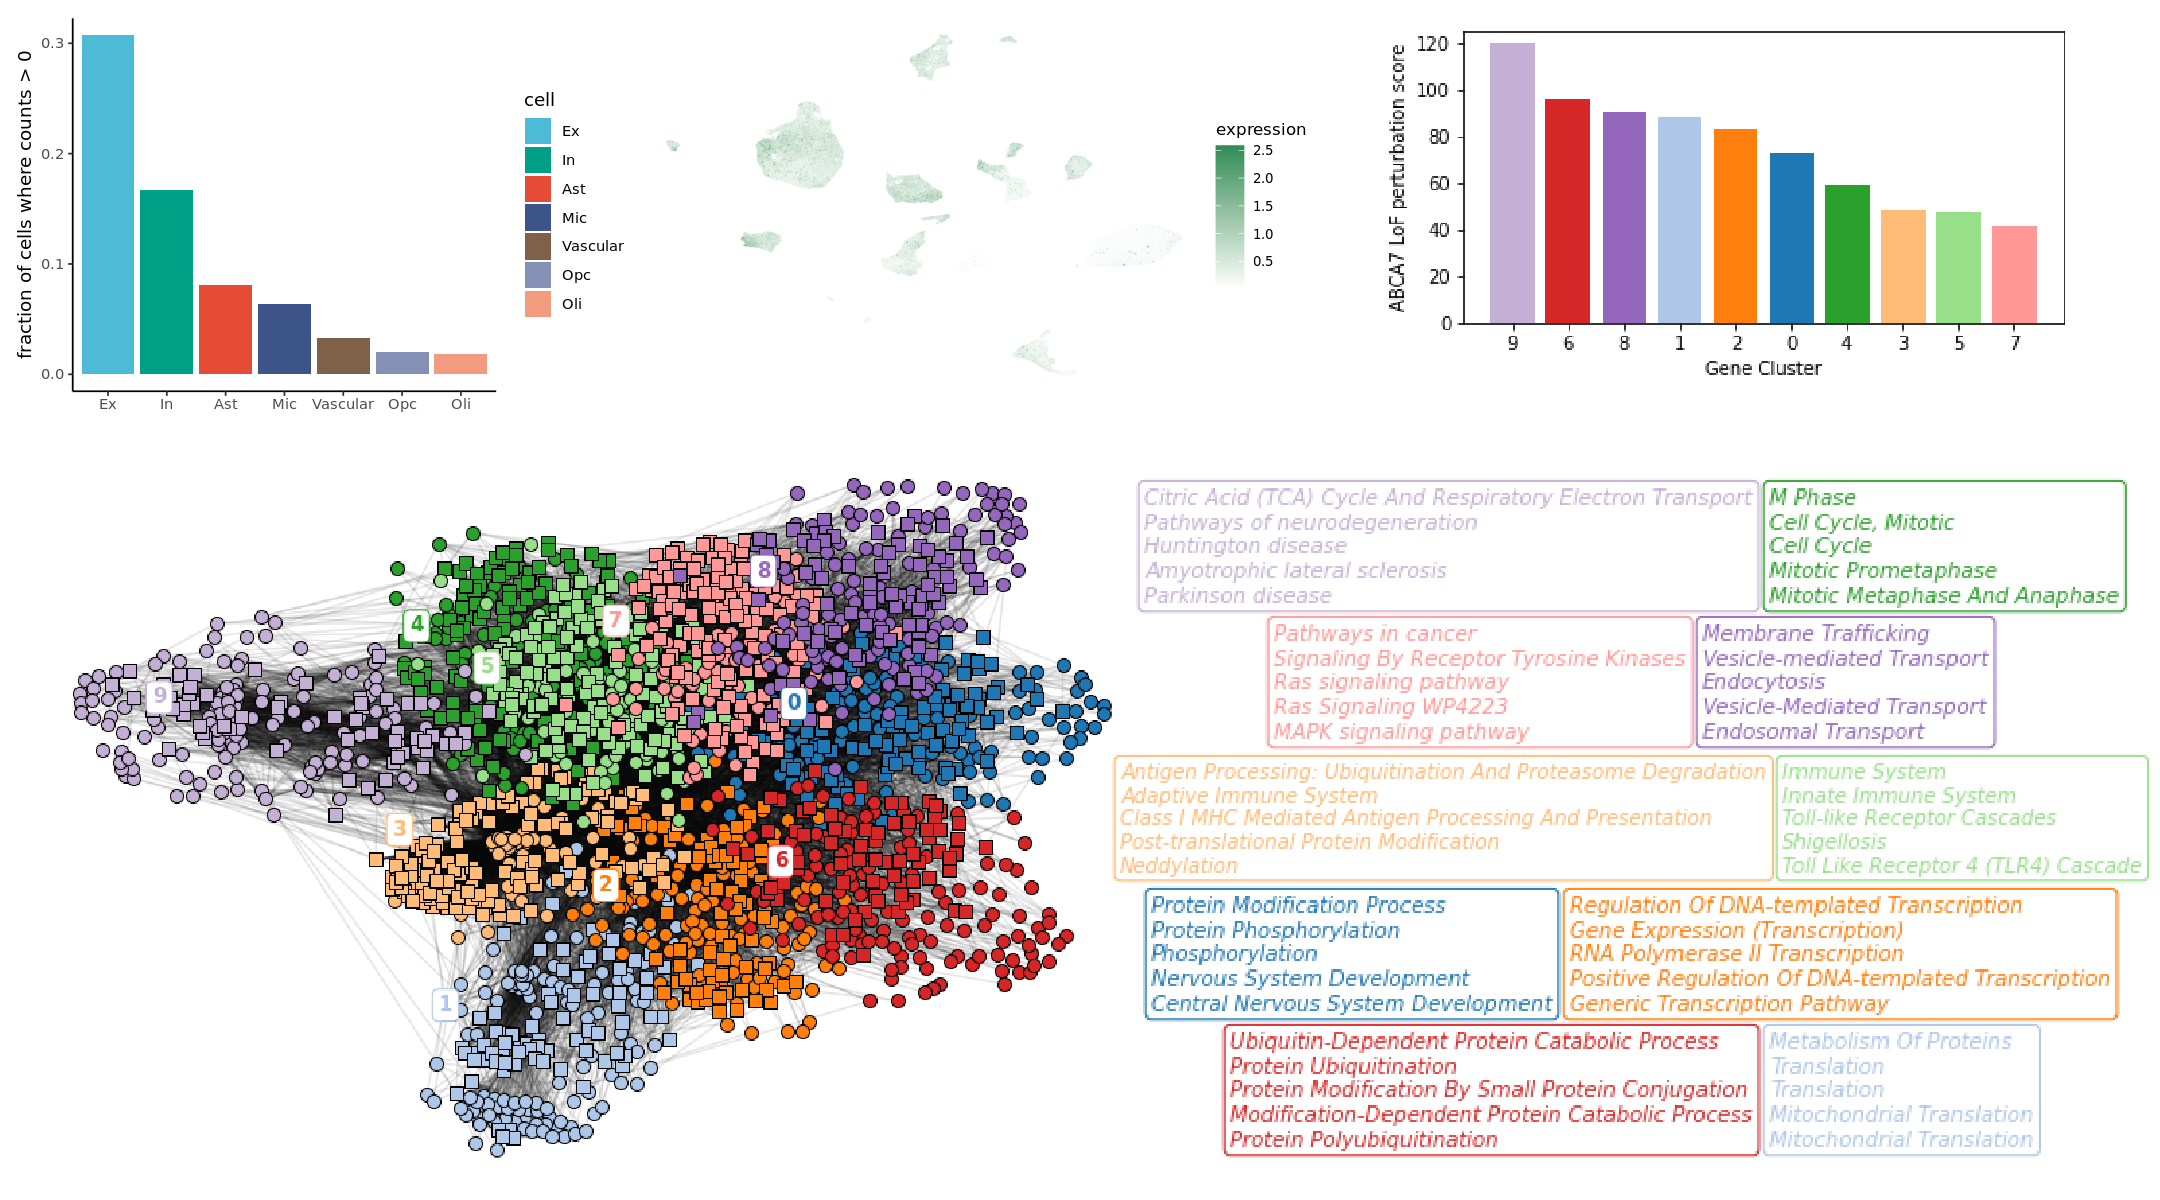

In [225]:
options(repr.plot.width=18, repr.plot.height=10)

(((p|abca7_expression|bars)+plot_layout(widths=c(1.5,2,3)))/(clusters | row)) + plot_layout(heights=c(2,4))

<u>**Figure 3**</u>
<a name="F3"></a>

In [ ]:
### show 1-2 clusters from F2, sub clustered (cluster colors) with all gene names in A
### color pathways by linear combinations of genes
### show specific pathways

<u>**Figure 4**</u>
<a name="F4"></a>

<u>**Figure 5**</u>
<a name="F5"></a>

<u>**Figure 6**</u>
<a name="F6"></a>

<u>**Extended Figure X**</u>
<a name="EF5"></a>

png 
  2

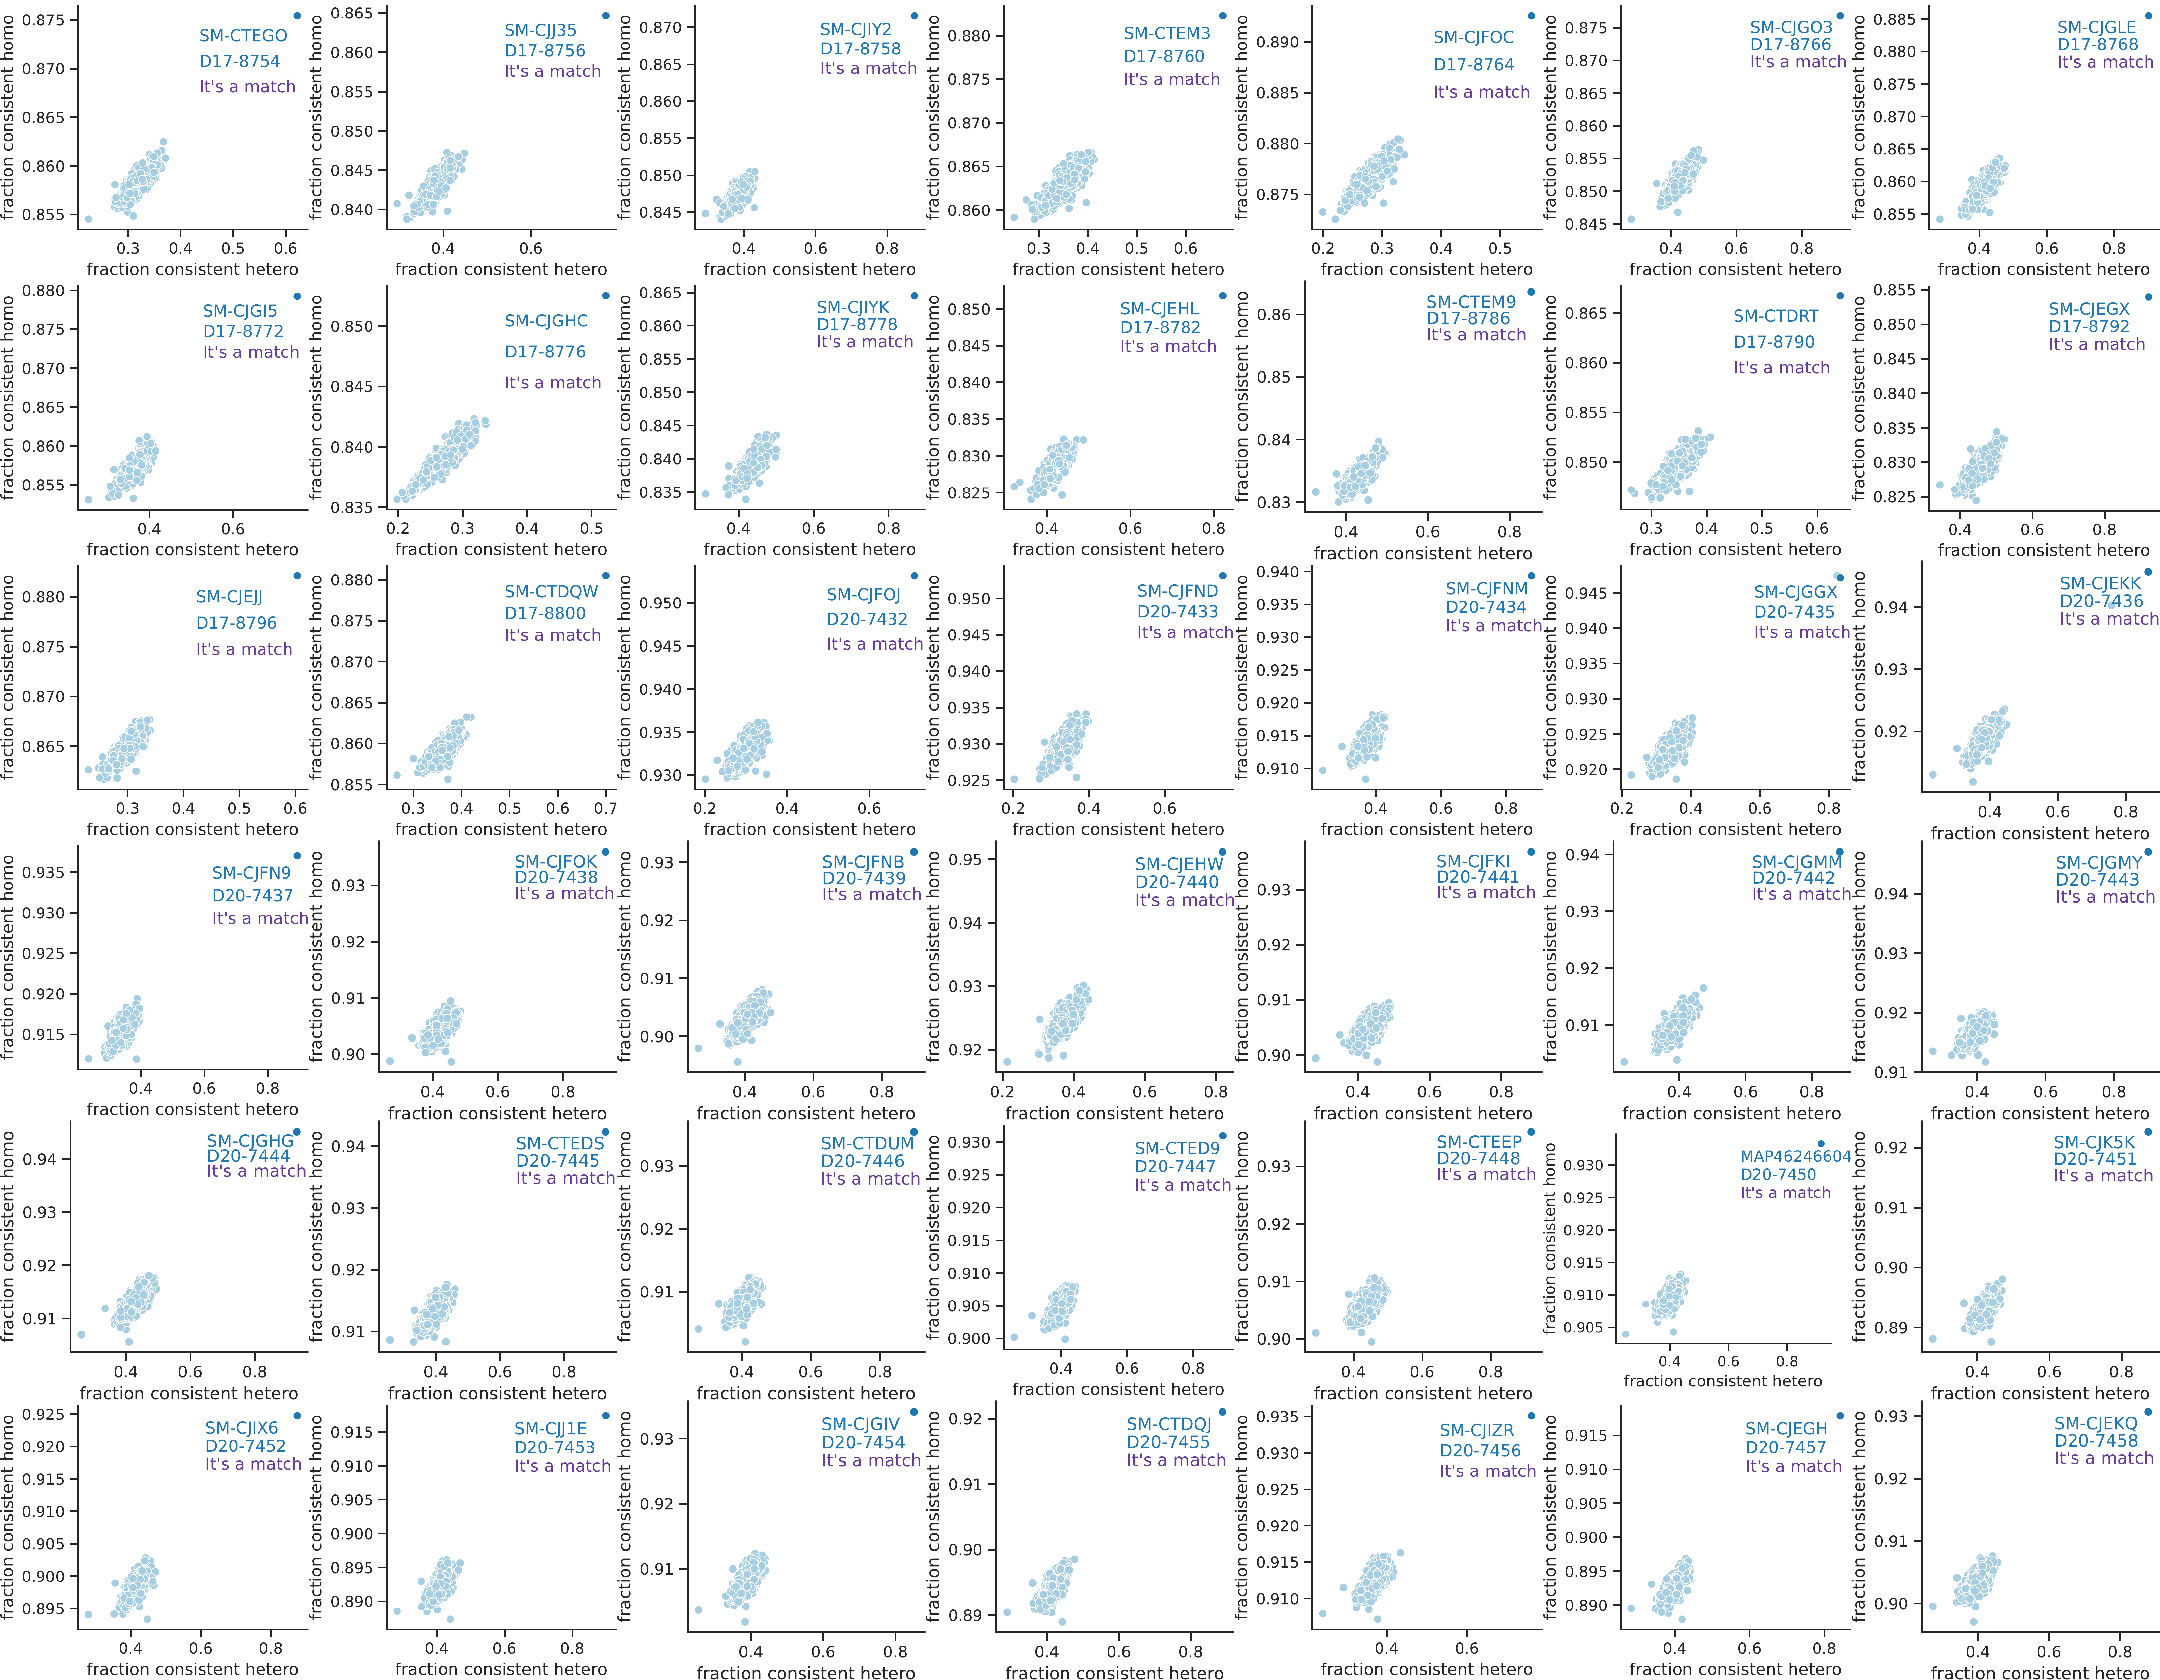

In [40]:
files = list.files(path = "./pdf_figures/.")
files = files[unlist(lapply(files, function(x) endsWith(x,'swap_res.pdf')))]
                            
plots = list()
for(i in 1:length(files)){
    plots[[i]] = image_ggplot(image_trim(image_read_pdf(paste0('./pdf_figures/', files[i]))))
}
     
options(repr.plot.width=18, repr.plot.height=14)

pdf('./pdf_figures/Extended_Figure_X.pdf', width=18, height=14)
do.call("grid.arrange", c(plots, ncol=7))
dev.off()
                            
do.call("grid.arrange", c(plots, ncol=7))
